# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
!curl -O https://nlp100.github.io/data/neko.txt
!mv neko.txt ./data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  943k  100  943k    0     0   800k      0  0:00:01  0:00:01 --:--:--  800k


In [2]:
!head data/neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。


In [5]:
!mecab data/neko.txt > data/neko.txt.mecab

In [7]:
# 出力結果 : 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
!head data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩は猫である	名詞,固有名詞,一般,*,*,*,吾輩は猫である,ワガハイハネコデアル,ワガハイワネコデアル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
filepath = 'data/neko.txt.mecab'
with open(filepath, 'r') as f:
    result_list = []
    line_list = []
    for line in f:
        if 'EOS' == line.strip():
            if line_list:
                result_list.append(line_list)
            line_list = []
        else:
            surface, others = line.split('\t')
            split_results = others.strip().split(',')
            
            if 9 == len(split_results):
                pos, pos1, _, _, _, _, base, _, _ = split_results
            elif 7 == len(split_results):
                pos, pos1, _, _, _, _, _ = split_results
                base = None
            line_list.append({
                'surface': surface,
                'base': base,
                'pos': pos, 'pos1': pos1
            })

result_list

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩は猫である', 'base': '吾輩は猫である', 'pos': '名詞', 'pos1': '固有名詞'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'},
  {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'かとん', 'base': '火遁', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'と', 'base': 'と', 'pos': '助詞'

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [4]:
def result_generator(txt_list):
    for line_result in txt_list:
        for word_result in line_result:
            yield word_result

verb_surfaces = set()
for w_result in result_generator(result_list):
    if '動詞' == w_result['pos']:
        verb_surfaces.add(w_result['surface'])

print(verb_surfaces)

{'講ずる', 'やめよ', '来れ', '登っ', 'ふっ', '焚く', '浴びる', 'こし', '描き出し', 'ゆか', '巻く', '諦め', '怒り', '滑ら', 'ぬか', 'よごれる', '忘れ', 'いらせられ', '崩す', 'じれ', '廃せ', 'こせつい', '貰え', 'あしらっ', '点じ', 'すき', '引き', '振り撒い', '在る', '振り返る', 'なわ', 'かくそ', 'あるけ', 'からかい', '拭う', '済まし', '切ら', '降っ', '狼狽え', 'さすっ', '呼ん', 'だまっ', 'やっ', '鳴り', '飽き', '抜け', '滑べっ', '振り向い', '及ぼし', 'いただく', '洩', '嫌っ', '解く', '考え込む', '暮らさ', '捲く', 'ひく', '切れる', '貰い', '隣り', '上げ', '喰う', '惹か', '問う', 'とまっ', 'あき', '蔽う', 'まじり', '捕まる', '吸い取ら', '曝し', '立つ', '損なっ', '退', 'あきらめる', 'こぼす', '剥げる', '這入っ', '惹い', '振り立てる', '過ぎん', 'まえる', '伺っ', '張れ', '喜ぶ', '荒立て', '禿げる', '栄える', '任せる', '貰う', '済し', 'してやれ', '思いやら', '溺れ', '打ち殺し', '仰ぎ', 'すくい', '生える', '引き下がっ', '売っ', '湧い', '加え', '判ぜ', '号する', 'ひそめ', 'つつま', '行ける', '浴びせかけ', 'しまお', '較べ', '作り上げ', '殺せ', 'つまら', '仕入れ', '罵る', '感じる', '言う', '途切れる', '避ける', 'はおら', '解き', '聞き合せ', '糺せ', '進める', 'けら', '飲み干し', 'つくばい', '括り', '沸き上がっ', '真似', '漬け', 'ととのっ', '好か', '捕れん', '奉', '睨ま', '釣り合う', 'したがっ', 'すも', '飲み下し', 'さす', '吃', '当ら', '恐れ入り', '移っ', 'しら', '入れよ', '与っ', '洗い', '断

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [5]:
verb_bases = set()
for w_result in result_generator(result_list):
    if '動詞' == w_result['pos']:
        verb_bases.add(w_result['base'])

print(verb_bases)

{'講ずる', '焚く', '浴びる', '巻く', 'よごれる', '崩す', '存じる', '引掻く', '遣わす', '在る', '振り返る', 'きめる', '読みかける', '抛る', '成す', '拭う', '振り上げる', '鳴かす', '力む', '服せる', '掘る', '追払う', 'いただく', '捲く', '救う', '解く', '考え込む', 'ひく', '甘んじる', '切れる', '喰う', '敷く', '熾る', 'あらう', '問う', '蔽う', '煩わす', '捕まる', '急き込む', 'ともる', '立つ', '炊く', '翻す', 'えむ', 'あきらめる', '睨む', '張り込む', 'こぼす', '剥げる', '振り立てる', 'まえる', '喜ぶ', '禿げる', 'あびる', '栄える', '任せる', '裏返す', '貰う', '縛る', '通じる', '望む', '攻める', '生える', '肥る', '聞き出す', 'ざんする', '号する', '弱る', '行ける', '漕ぎつける', '若く', '罵る', '感じる', '言う', '途切れる', '避ける', '迷わす', '候う', '進める', 'とおる', 'こしらえる', 'からまる', '負う', '釣り合う', '終える', 'さす', '巡る', '呼びかける', 'あげる', '聞き惚れる', '押し込める', 'なれる', 'ためす', '悟る', '食わせる', '見送る', 'ぬかる', '頑張る', '開き直る', '拭き込む', '抱く', '舐める', 'ぱちつかせる', '包む', '笑う', '懲らしめる', '睨みつける', '着せる', '流れ出す', '併せる', '上がれる', '上がる', '解する', '相成る', 'むける', '略する', '仕る', '知らせる', '仰せる', '蹶る', 'こりる', '戦う', '打ち抜く', '鍛え上げる', '追い詰める', '取り残す', 'いむ', '切り落す', 'あしらう', 'やむを得る', '済む', '集まる', '応ずる', '解せる', '伺える', '溶かす', 'いる', '弾く', 'つまる', '設ける', '構える', '奏す', 

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
prev_w_result = None
prev_2_w_result = None
concat_names = set()
for next_w_result in result_generator(result_list):
    if (prev_w_result and prev_2_w_result):
        if ('の' == prev_w_result['surface']
            and '名詞' == next_w_result['pos']
            and '名詞' == prev_2_w_result['pos']):
            concat_names.add(f"{prev_2_w_result['surface']}{prev_w_result['surface']}{next_w_result['surface']}")
    prev_2_w_result = prev_w_result
    prev_w_result = next_w_result
concat_names

{'東嶺寺の鐘',
 '腸の中',
 '世の学問',
 '週間の間',
 '人の中',
 '軍の中',
 '居士の墓',
 '提灯の火',
 '身分の高い',
 '俺の汁粉',
 '人間の十',
 '頭の吟',
 'かたのよう',
 '相当の功果',
 '好奇の心',
 '何の択',
 '種類のもの',
 '歴々の学者',
 '動物の正体',
 'ベルの音',
 '人の所有',
 '新聞の上',
 '皿のカステラ',
 '舞台の真中',
 '円のじゃよく',
 '寒月の名',
 '読本の中',
 '類似の事',
 '細君の枕元',
 '種類の運動',
 '烏賊の墨',
 '女の足',
 '人類の生息',
 '勘弁のしよう',
 '敷島の煙',
 '逆上の説明',
 '膝の傍',
 '彼等の中間',
 '浅草警察署の管轄',
 '向の白',
 '葛藤の三分一',
 '無線の電信',
 '明治の秀才',
 '鋲の頭',
 '呼吸の用',
 '教師の家で',
 '自分の勢力',
 '封の中',
 '咽喉の出口',
 '吾輩のうち',
 '唯一の楽',
 '通例の書生',
 '不振の際',
 '一本の枝',
 '霊の気',
 '贅沢の沙汰',
 '玉のよう',
 '足の下',
 '児の毛',
 '明瞭の答',
 '本気の沙汰',
 '風流の極度',
 '一種の寄生虫',
 '内容のいかん',
 '寝室の方',
 '吾輩の爪',
 '蛇の面',
 'さんの顔',
 '窟の主人',
 '君の国の書生',
 '大の贅沢',
 '西洋の鳶口',
 '先生の評判',
 '柳行李の辺',
 'こちらの刃',
 '利害の関係',
 '味方の恥辱',
 '相思の情',
 '口の周囲',
 '顔の讒訴',
 '迷亭のよう',
 '野暮の極',
 '本当のところ',
 '主人の彩色',
 '嬢のため',
 'パナマの価',
 '食いの隊長',
 'ヴァイオリンの胴',
 '曲者の魔力',
 '人の横',
 '自己の力量',
 '上の不便',
 '主人の予定',
 '家の倉',
 '一流の批評家',
 '種の液',
 '間の交際',
 '隅田川の底',
 '今朝の雑煮',
 '右の前足',
 '裸体の美人',
 '以来の大戦争',
 '座敷のうち',
 '愛の方',
 '中の嫦娥',
 '彼の悟

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
longest_nouns = set()
for line_result in result_list:
    line_noun = []
    for w_result in line_result:
        if '名詞' == w_result['pos']:
            line_noun.append(w_result['surface'])
        else:
            if len(line_noun) > 1:
                longest_nouns.add(''.join(line_noun))
            else:
                line_noun = []
longest_nouns

{'細君相形格子戸ベル',
 '人間世界愛法則',
 '東風君一人',
 '十九世紀',
 '三人保険心丈夫ん事ん',
 '水島君博士論文呈出博士学位',
 '迷亭先生煙管膝頭',
 '源ちゃん昨夕忙',
 'これぎりかいと今日みんな',
 '雁鍋誂らえて来い蕪香の物塩煎餅いっしょ雁味例茶羅ッ鉾口',
 '落雲館名誉関係',
 '唐物屋白気主人白注文の十二三年以前事白時代ただ今',
 '富子さん失敬大変',
 'せんだってじゅう大変毎日毎日こないだうちの頃',
 '菓子皿縁',
 '按腹揉療治',
 '沙弥君迷亭咎め立主人どっち事',
 '一尺四方',
 '二枚かけ注文のマドンナ双幅逼ラファエル迷惑物二枚方困難',
 '天璋院様祐筆妹嫁先きのかさん甥娘なん先んそれ',
 '一斤承知ん仕方',
 '左りの方口',
 '行為言動人工的コセ自分窮屈世の中見合',
 '皆形心',
 '岩見重太郎大刀蟒',
 '寒月君ため猫義侠心一度金田家動静事それただ一遍その後猫良心よう陋劣振舞事',
 '三四時間夜具',
 '皆団扇',
 '屈竟手懸り尾啣左右尾前歯間胴体新聞',
 '町内中苦手',
 '鞘払時',
 '自己以外事',
 '摩擦術二者一',
 'ボイにおいトチメンボー二人前',
 '神ジュピター下',
 '寒月君それ失恋陽気元気ん主人寒月君迷亭君失恋評寒月君娘丸薬缶東京',
 '南郷街道二丁鷹台町市内古城町仙石町喰代町横通町一丁目二丁目三丁目尾張町',
 '越智東風高輪事件旅順陥落',
 'なに上品せん鼻主時容子実業家贔負尊公辟易',
 '托販売',
 '張りたてところ経験時',
 '六十二回六十三回回期日十円気よう',
 '苦沙弥先生先生苦沙弥',
 '時以後人',
 '四百六十五行四百七十三行御覧希臘語云々た方希臘語沙弥君それ僕賛成物欲しそう事方主人',
 '鮑貝した腹休養必要',
 '主人苦沙弥君気違事以上は落雲館君子風流漢事',
 '一体どう訳ん',
 '其胆力於河豚漢其勇気於',
 '坊ば当年三歳細君気食事とき三歳小形箸茶碗の坊ば承知',
 '経ずし吾妻橋事件処廻以上人軒下犬報道得々人',
 '各自任意',
 '七代目樽金お待ち',
 '賓頭顱頭光明不思議薫不思議臭喩斯様鼻筋君演者自身局部回護恐れ',
 '是非元よう人足人足いかん懺悔意ためあなた自身仏意ん',


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [71]:
#  句点等が出てきても面白くないので除外する
stop_words = {
    'の', '。', '、', 'て', 'は', 'に', 'を', 'だ', 'と', 'が', 'た', 'する', '「',
    '」', 'ない', 'も', 'ある', 'で', 'から', 'いる', 'か', 'ん', '云う', '事', 'です',
    'なる', 'ます', 'へ', 'もの' , 'う', 'ぬ', 'よう', '見る', 'ね', 'この', 'ば', '御', 'その', '何',
       'よ', 'そう', 'れる', '…', 'じゃ', '\u3000', 'これ', 'さ'
}

word_count = {}
for w_result in result_generator(result_list):
    base = w_result['base']
    if not base:
        continue
        
    # stop wordsは除外
    if base in stop_words:
        continue
    word_count.setdefault(base, 0)
    word_count[base] += 1

display_words = 30
for word, count in sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:display_words]:
    print(f'{word}: {count:,}')

君: 955
主人: 928
思う: 498
吾輩: 477
来る: 457
人: 449
それ: 370
聞く: 347
でも: 343
迷亭: 343
行く: 336
出来る: 322
時: 316
ところ: 310
まで: 304
な: 297
一: 294
方: 294
やる: 292
上: 286
寒月: 278
先生: 274
いい: 270
くらい: 269
出る: 267
人間: 265
僕: 263
顔: 262
ごとし: 254
また: 236


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.font_manager._rebuild() #キャッシュの削除
plt.rcParams['font.family'] = 'IPAexGothic' # インストールしたフォントを指定

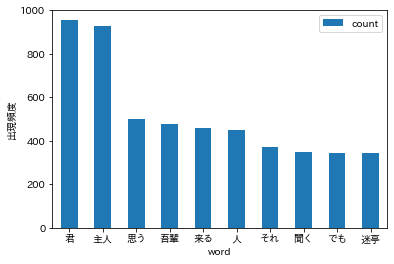

In [73]:
import pandas as pd

def draw_word_bars(count_dict, ylim):
    count_df = pd.DataFrame([{'word': _w, 'count': _c} for _w, _c in count_dict.items()])
    count_df.sort_values(by='count', ascending=False).head(10).plot(kind='bar', x='word', y='count')
    plt.ylim(ylim)
    plt.ylabel('出現頻度')
    plt.xticks(rotation=0)
    plt.show()

draw_word_bars(word_count, (0, 1000))

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

吾輩: 56
人間: 41
思う: 27
主人: 23
くらい: 19
など: 18
出来る: 17
君: 16
まで: 16
いう: 15
人: 15
さえ: 14
より: 14
上: 13
ところ: 13
やる: 13
ござる: 13
でも: 12
しかし: 12
一: 11
ながら: 11
声: 11
として: 11
顔: 11
ごとし: 11
中: 11
だけ: 11
だって: 11
べし: 10
ほど: 10


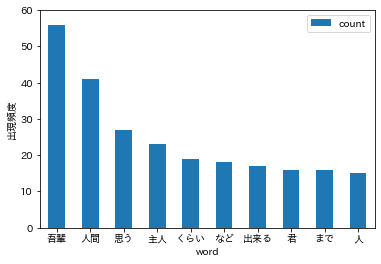

In [74]:
# 「猫」という単語が現れる文中の単語をカウント
cat_count = {}
for line_result in result_list:
    base_line = []
    for _l in line_result:
        base = _l['base']
        if base:
            base_line.append(base)
    if '猫' not in ''.join(base_line):
        continue

    for w_result in line_result:
        base = w_result['base']
        if not base:
            continue
        
        # stop wordsは除外
        if base in stop_words:
            continue
        cat_count.setdefault(base, 0)
        cat_count[base] += 1

del cat_count['猫']
        
display_words = 30
for word, count in sorted(cat_count.items(), key=lambda x: x[1], reverse=True)[:display_words]:
    print(f'{word}: {count:,}')

draw_word_bars(cat_count, (0, 60))

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

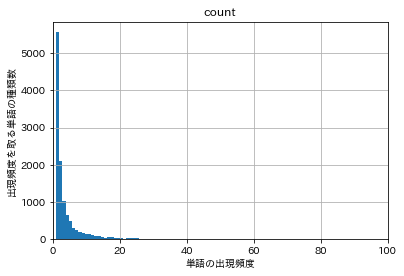

In [86]:
count_df.hist('count', bins=1000)
plt.xlim(0, 100)
plt.xlabel('単語の出現頻度')
plt.ylabel('出現頻度を取る単語の種類数')
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

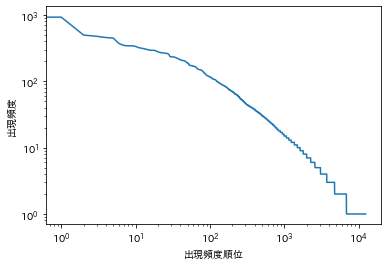

In [103]:
zipf_df = count_df.sort_values(by='count', ascending=False).reset_index()
x = zipf_df.index.values
y = zipf_df['count'].values
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()